In [1]:
#  Importing required libraries / Gerekli kütüphaneleri yüklüyoruz
import pandas as pd  # For data manipulation / Veri işleme için
import numpy as np   # For numerical operations / Sayısal işlemler için
import matplotlib.pyplot as plt  # For plotting / Grafik çizmek için
import seaborn as sns  # For advanced visualizations / Gelişmiş görselleştirme için

from sklearn.preprocessing import StandardScaler  # For data normalization / Verileri ölçeklendirme
from sklearn.cluster import KMeans  # K-Means clustering algorithm / K-Means kümeleme algoritması
from sklearn.decomposition import PCA  # For dimensionality reduction / Boyut indirgeme için


In [2]:
# Connecting and accessing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  Loading the dataset / Veriyi yüklüyoruz
df = pd.read_csv("/content/drive/MyDrive/data_mining_clustering/StudentsPerformance.csv")  # Replace with your path if needed / Gerekirse kendi yolunla değiştir
df.head()  # Show the first 5 rows / İlk 5 satırı göster


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#  Converting categorical columns to numeric / Kategorik sütunları sayısala çeviriyoruz
df_encoded = pd.get_dummies(df, drop_first=True)
# Converts 'Gender' and 'Geography' to numeric using one-hot encoding / Gender ve Geography sütunlarını one-hot ile sayısala çevirir
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [6]:
#  Scaling the data / Veriyi ölçeklendiriyoruz
scaler = StandardScaler()  # Standardizes data (mean=0, std=1) / Verileri ortalama=0, std=1 olacak şekilde normalize eder
scaled_data = scaler.fit_transform(df_encoded)  # Apply transformation / Dönüştürmeyi uygula

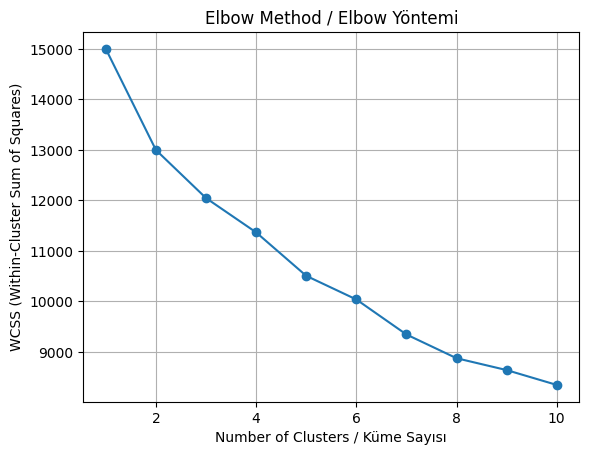

In [7]:
#  Finding optimal number of clusters using Elbow Method / Elbow yöntemi ile ideal küme sayısını bulma
wcss = []  # Within-cluster sum of squares / Küme içi kareler toplamı

for i in range(1, 11):  # Trying from 1 to 10 clusters / 1'den 10 kümeye kadar deniyoruz
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia means WCSS / Inertia değeri WCSS demektir

# 📈 Plotting the Elbow graph / Elbow grafiğini çiziyoruz
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method / Elbow Yöntemi")
plt.xlabel("Number of Clusters / Küme Sayısı")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [10]:
#  Applying KMeans clustering / KMeans kümeleme algoritmasını uyguluyoruz
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)  # You can change the cluster count / Küme sayısını değiştirebilirsin
clusters = kmeans.fit_predict(scaled_data)  # Assign each sample to a cluster / Her veri noktasına küme atar

df["Cluster"] = clusters  # Add cluster results to original dataframe / Küme sonuçlarını ana veri setine ekle

In [11]:
#  Reducing dimensions with PCA for visualization / PCA ile veriyi görselleştirmek için 2 boyuta indiriyoruz
pca = PCA(n_components=2)  # We reduce it to 2 dimensions / 2 boyuta indiriyoruz
pca_data = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])  # Principal Components / Ana bileşenler
df_pca["Cluster"] = clusters  # Cluster labels / Küme etiketlerini ekliyoruz

In [13]:
# 📌 Checking cluster statistics / Kümeleme sonuçlarının istatistiklerine bakıyoruz
df["Cluster"].value_counts()  # Number of customers in each cluster / Her kümede kaç müşteri var

,count
Cluster,
1,398
2,380
0,222


In [14]:
# 📌 Analyzing cluster characteristics / Kümelerin özelliklerini analiz ediyoruz
# Add the cluster results to the encoded dataframe for analysis
df_encoded["Cluster"] = clusters
df_encoded.groupby("Cluster").mean()  # Cluster-wise feature averages / Her kümenin ortalama değerleri

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
Cluster,,,,,,,,,,,,,,,
0,70.747748,73.810811,74.211712,0.472973,0.000000,0.000000,1.000000,0.000000,0.103604,0.126126,0.103604,0.292793,0.189189,0.684685,0.648649
1,75.665829,79.288945,78.336683,0.402010,0.198492,0.442211,0.000000,0.278894,0.165829,0.135678,0.062814,0.228643,0.143216,0.783920,0.489950
2,53.336842,55.857895,53.686842,0.571053,0.292105,0.376316,0.105263,0.076316,0.076316,0.300000,0.028947,0.184211,0.210526,0.476316,0.797368


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veriyi yükle
df = pd.read_csv("/content/drive/MyDrive/data_mining_clustering/StudentsPerformance.csv")

# Performans sütunları
X = df[["math score", "reading score", "writing score"]]

# Ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means kümeleme (örnek: 3 küme)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


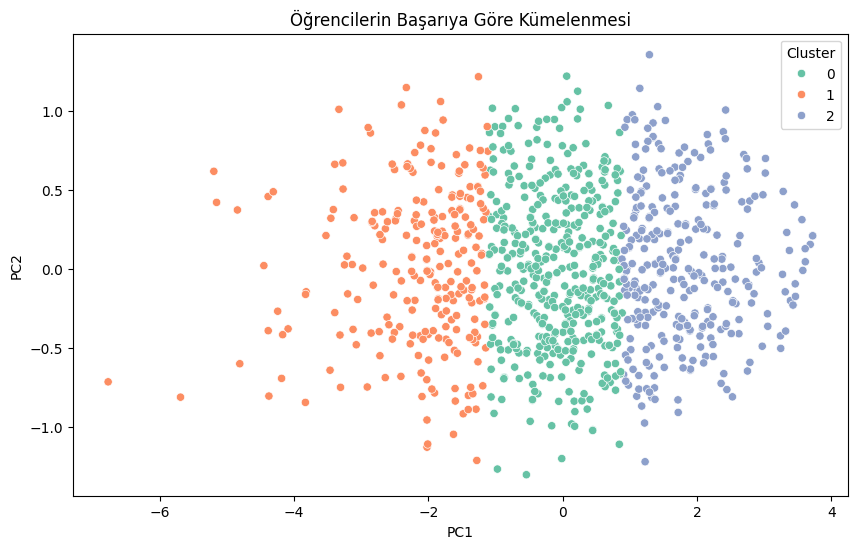

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", palette="Set2")
plt.title("Öğrencilerin Başarıya Göre Kümelenmesi")
plt.show()


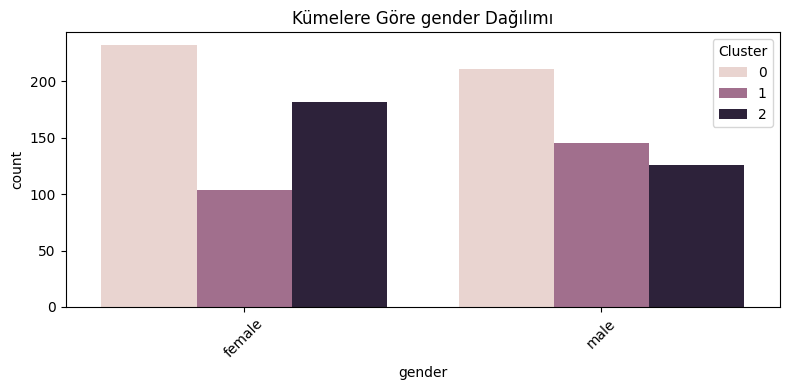

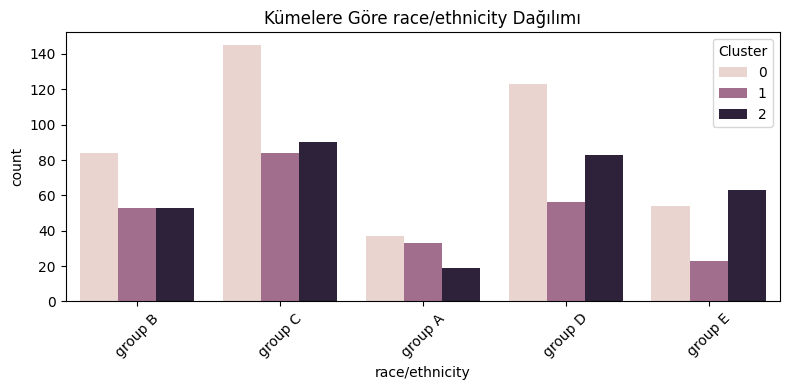

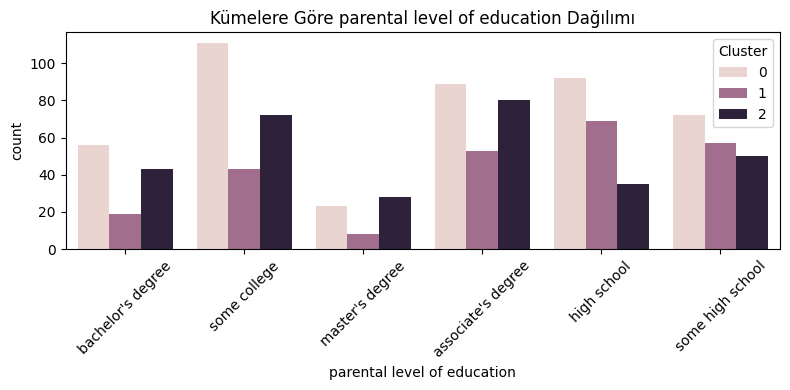

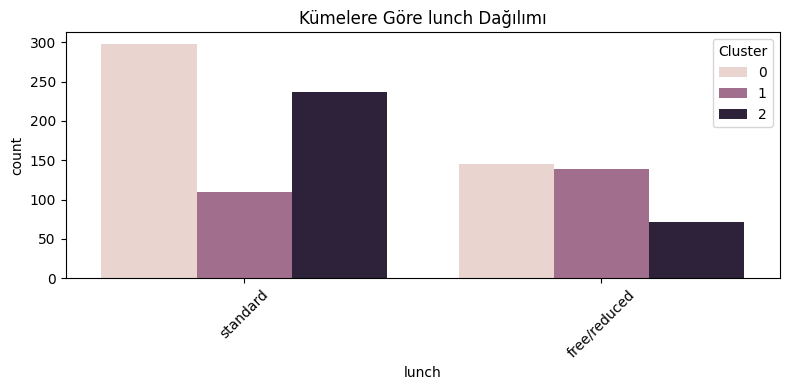

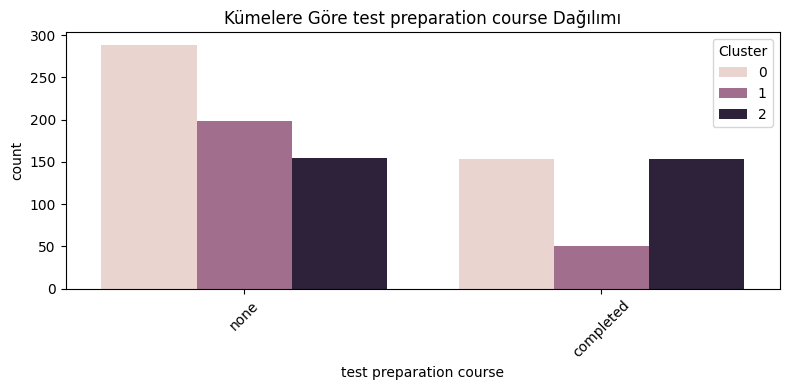

In [19]:
demographics = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

for col in demographics:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="Cluster")
    plt.title(f"Kümelere Göre {col} Dağılımı")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
